## Descripción

Vamos a trabajar con datos sobre los precios de la vivienda derivados del Servicio del Censo de los EE. UU. Simulando que somos una agencia de vivienda en Boston, queremos dar respuesta a las siguientes preguntas:

+ ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no?

+ ¿Existe una diferencia en los valores medios de las casas de cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940?

+ ¿Podemos concluir que no existe una relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad?

+ ¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston en el valor medio de las viviendas ocupadas por sus propietarios?

En primer lugar, importamos las siguientes librerías

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats

A continuación, se describen las variables del conjunto de datos:

·           CRIM - tasa de criminalidad per cápita por ciudad.

·           ZN - proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.

·           INDUS - proporción de acres comerciales no minoristas por ciudad.

·           CHAS - variable ficticia del Río Charles (1 si el tramo limita con el río; 0 en caso contrario).

·           NOX - concentración de óxidos nítricos (partes por 10 millones).

·           RM - número medio de habitaciones por vivienda.

·           AGE - proporción de unidades ocupadas por el propietario construidas antes de 1940.

·           DIS - distancias ponderadas a cinco centros de empleo de Boston.

·           RAD - índice de accesibilidad a carreteras radiales.

·           TAX - tasa de impuesto a la propiedad de valor total por $10,000.

·           PTRATIO - proporción alumno-profesor por municipio.

·           LSTAT - % menor estado de la población.

·           MEDV - valor medio de las viviendas ocupadas por sus propietarios en $1000.

Accedemos al conjunto de datos

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

### Para el "Valor medio de las casas ocupadas por el propietario", proporcionamos un diagrama de caja

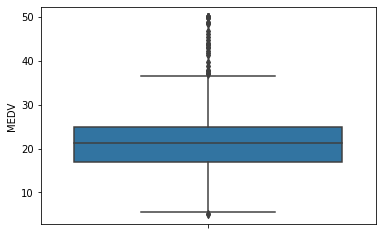

In [4]:
ax = sns.boxplot(y='MEDV', data=boston_df)

Observando el digrama de caja podemos decir que la mediana del valor medio de las viviendas ocupadas por sus propietarios está por encima de 20 (20000 $). Que el Q1 está en torno a 17-18 y el Q3 en 25

### Proporcionar un histograma para la variable del río Charles

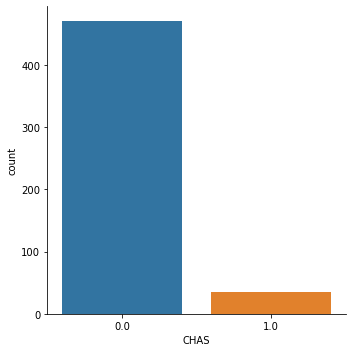

In [5]:
sns.catplot(x='CHAS', kind= 'count', data=boston_df)

Podemos observar en el histograma que es mucho mayor la cantidad de tramo que no delimita con el río Charles (aproximadamente 500) frente con el que sí lo hace (no llega a 50)

### Proporcionamos un diagrama de caja para la variable MEDV frente a la variable AGE. (Discretizamos la variable de edad (age) en tres grupos de 35 años o menos, entre 35 y 70 años y 70 años y más)

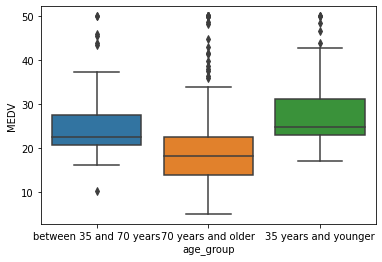

In [6]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

bx = sns.boxplot(x= 'age_group', y='MEDV', data=boston_df)

Podemos observar que el grupo de 35 y menos es el que tiene mayor mediana

### Proporcionamos un diagrama de dispersión para mostrar la relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad. ¿Qué podemos decir sobre la relación?

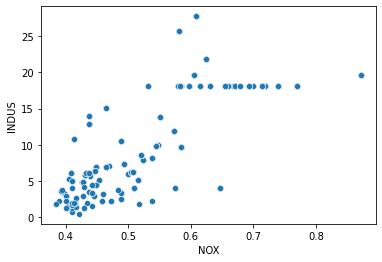

In [7]:
cx = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

Parece que sí hay relación entre ambas variables. Cuanto mayor son las conecntraciones de óxido nítrico, más crece la proporción de acres comerciales no minoristas por ciudad

### Creamos un histograma para la variable de proporción de alumnos por maestro

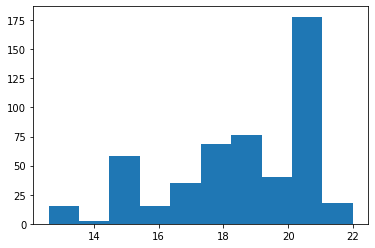

In [8]:
plt.hist(boston_df['PTRATIO'])
plt.show()

Observamos que la mayor proporción de alumnos por maestro se encuentra entre 20 y 22

### ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no?

Usaremos la prueba T para muestras independientes. Para la prueba T independiente, las siguientes suposiciones deben cumplirse.

Una variable independiente, categórica de dos niveles o de grupo Una variable dependiente continua Independencia de las observaciones. Cada sujeto debe pertenecer unicamente a un grupo. No hay relación entre las observaciones de cada grupo. La variable dependiente debe tener una distribución normal Presunción de homogeneidad de la varianza Estado de la hipótesis

𝐻_0:µ_1=µ_2 ("no hay diferencia en el valor medio de las casas delimitadas por el río Charles y de las que no")

𝐻_1:µ_1≠µ_2 ("hay diferencia en el valor medio de las casas delimitadas por el río Charles de las que no")

Podemos utilizar la prueba de Levene en Python para verificar la significancia de la prueba

In [9]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

# debido a que el valor p es menor a 0.05 podemos asumir que no hay igualdad en la varianza

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [10]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**Conclusión:** Debido a que el valor p es menor al valor alpha de 0.05, rechazamos la hipótesis nula ya que no es prueba suficiente de que exista una diferencia estadística en el valor medio de las casas en base a su delimitación con el río Charles

### ¿Existe una diferencia en los valores medianos de las casas (MEDV) para cada proporción de unidades ocupadas por el propietario construidas antes de 1940 (AGE)?

Primero, agrupamos en categorías debido a que ANOVA no puede trabajar con variables continuas, nuestras categorías serán proporciones de unidades ocupadas por el propietario entre:

+ 35 unidades o menos
+ 35 y 60 unidades
+ 60 unidades o mas

In [11]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 units and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 60), 'age_group'] = 'between 35 and 60 units'
boston_df.loc[(boston_df['AGE'] >= 60), 'age_group'] = '60 units and older'

Estado de la hipótesis

𝐻_0:µ_1=µ_2=µ_3 (las medias de las tres poblaciones son iguales)

𝐻_1: al menos una de las medias es distinta

Prueba de igualdad de la varianza

In [12]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 units and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 60 units']['MEDV'], 
                   boston_df[boston_df['age_group'] == '60 units and older']['MEDV'], 
                   center='mean')
# debido a que el valor p es mayor a 0.05, podemos asumir que hay igualdad entre las varianzas

LeveneResult(statistic=2.5180756421630073, pvalue=0.08163041273230955)

Primero, separamos cada una de las tres muestras (una para cada categoría de trabajo) en una variable.

In [13]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 units and younger']['MEDV']
thirtyfive_sixty = boston_df[boston_df['age_group'] == 'between 35 and 60 units']['MEDV']
sixty_older = boston_df[boston_df['age_group'] == '60 units and older']['MEDV']

Ahora, ejecutamos el análisis ANOVA de una vía.

In [14]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_sixty, sixty_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 30.005688785101974, P-Value: 4.889671107135179e-13


**Conclusión:** Debido a que el valor p es menor a 0.05, rechazamos la hipótesis nula ya que hay evidencia significativa de que al menos una de las medias es distinta.

### ¿Podemos concluir que no existe una relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad?

Estado de la hipótesis:

𝐻_0: La concentración de óxido nítrico no está correlacionada con la proporción de acres comerciales no minoristas por ciudad

𝐻_1: La concentración de óxido nítrico está correlacionada con la proporción de acres comerciales no minoristas por ciudad

Debido a que ambas son variables continuas podemos usar una prueba de correlación de pearson y dibujar un diagrama de dispersión.

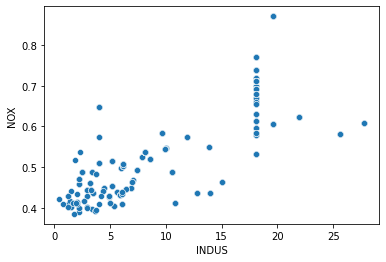

In [15]:
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)

In [16]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209151, 7.913361061238693e-98)

**Conclusión:** Debido a que el valor p < 0.05, rechazamos la hipótesis nula y concluimos que existe una relación entre la concentración de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad

### ¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston en el valor medio de las viviendas ocupadas por sus propietarios?

In [ ]:
## X son las variables de entrada (o variables independientes)
X = boston_df['DIS']
## y es la variable objetivo/dependiente
y = boston_df['MEDV']
## añadir un intercepto (beta_0) a nuestro modelo
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Imprimir las estadísticas
model.summary()